# Visualisations

Code for generating communication grid illustrations shown in the paper.

In [1]:
import pathlib

import networkx as nx
import numpy as np

import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 600

from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
import utils

In [3]:
# # Use latex for exporting
# # mpl.use("pgf")
# mpl.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
print(mpl.get_backend())
mpl.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'Times New Roman',
#     'font.serif': 'Times',
#     'text.usetex': True,
})

module://matplotlib_inline.backend_inline


In [4]:
G, pos = utils.gen_graph(3, 3)

In [5]:
# Set up scenarios
votes = [True, True, False, False, True, False, True, False, False]
is_reliable = [False, True, False, True, True, False, False, True, True]

trust_edges_oracle = {(i, j): is_reliable[i] and is_reliable[j] for i, j in G.edges}
trust_edges = {
 (0, 3): True,
 (0, 1): True,
 (1, 0): True,
 (1, 4): False,
 (1, 2): True,
 (2, 1): True,
 (2, 5): False,
 (3, 0): False,
 (3, 6): True,
 (3, 4): False,
 (4, 1): True,
 (4, 3): False,
 (4, 7): False,
 (4, 5): True,
 (5, 2): True,
 (5, 4): False,
 (5, 8): True,
 (6, 3): False,
 (6, 7): True,
 (7, 4): True,
 (7, 6): False,
 (7, 8): True,
 (8, 5): False,
 (8, 7): False
}

In [6]:
OUTPUT_DIR = pathlib.Path("./out")

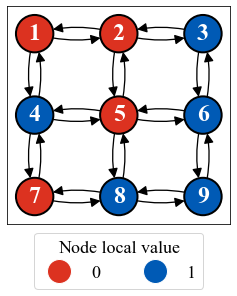

In [11]:
# Basic example
fig, ax = utils.draw_grid(G, pos, votes)
fig.savefig(OUTPUT_DIR / "grid_example_full_trust_9_agents.svg", bbox_inches="tight")
utils.export_to_pdf(OUTPUT_DIR / "grid_example_full_trust_9_agents.svg")

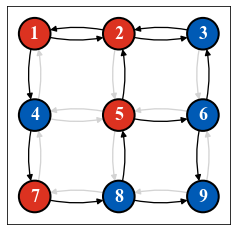

In [8]:
# Example with trust
fig, ax = utils.draw_grid(G, pos, votes, trust_edges=trust_edges, show_legend=False, font_size=18, node_size=1000, arrow_size=12)

# SVG because we manually add labels to a selection of edges
# (networkx's edge-labeling isn't good enough)
# Also need to make node size and font sizes smaller to allow more space for labels.
fig.savefig(OUTPUT_DIR / "grid_example_partial_trust_9_agents.svg", bbox_inches="tight")

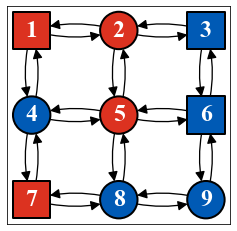

In [12]:
# Unreliable agents, trust all
fig, ax = utils.draw_grid(G, pos, votes, is_reliable=is_reliable, show_legend=False)
fig.savefig(OUTPUT_DIR / "unreliable_agents_trust_all.svg", bbox_inches="tight")
utils.export_to_pdf(OUTPUT_DIR / "unreliable_agents_trust_all.svg")

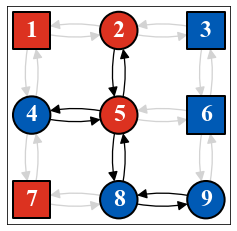

In [13]:
# Unreliable agents, oracle solution
fig, ax = utils.draw_grid(G, pos, votes, is_reliable=is_reliable, trust_edges=trust_edges_oracle, show_legend=False)
fig.savefig(OUTPUT_DIR / "unreliable_agents_oracle.svg", bbox_inches="tight")
utils.export_to_pdf(OUTPUT_DIR / "unreliable_agents_oracle.svg")